In [1]:
import pandas as pd
import random

In [11]:
!pip install openpyxl

     -------------------------------------- 249.8/249.8 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing1.xlsx'
employee_marketing1 = pd.read_excel(path)

In [3]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing2.xlsx'
employee_marketing2 = pd.read_excel(path)

In [4]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing3.xlsx'
employee_marketing3 = pd.read_excel(path)

In [5]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing4.xlsx'
employee_marketing4 = pd.read_excel(path)

In [6]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing5.xlsx'
employee_marketing5 = pd.read_excel(path)

In [7]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing6.xlsx'
employee_marketing6 = pd.read_excel(path)

In [8]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing7.xlsx'
employee_marketing7 = pd.read_excel(path)

In [9]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing8.xlsx'
employee_marketing8 = pd.read_excel(path)

In [10]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing9.xlsx'
employee_marketing9 = pd.read_excel(path)

In [11]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing10.xlsx'
employee_marketing10 = pd.read_excel(path)

In [12]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing11.xlsx'
employee_marketing11 = pd.read_excel(path)

In [13]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing12.xlsx'
employee_marketing12 = pd.read_excel(path)

In [14]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Marketing\excel_version\employee_marketing13.xlsx'
employee_marketing13 = pd.read_excel(path)

In [15]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Life Style\excel_version\employee_lifestyle1.xlsx'
employee_lifestyle1 = pd.read_excel(path)

In [16]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Clean Energy\excel_version\employee_clean_energy1.xlsx'
employee_clean_energy1 = pd.read_excel(path)

In [17]:
path = r'D:\0000 Ironhack\0000 Classes\week22 (Final Project)\Final Proyect\employee_data\Clean Energy\excel_version\employee_clean_energy2.xlsx'
employee_clean_energy2 = pd.read_excel(path)

In [18]:
employee_table = pd.concat([employee_marketing1,employee_marketing2,employee_marketing3,employee_marketing4,employee_marketing5,employee_marketing6,employee_marketing7,employee_marketing8,employee_marketing9,employee_marketing10,employee_marketing11,employee_marketing12,employee_marketing13,employee_lifestyle1,employee_clean_energy1,employee_clean_energy2], axis=0, ignore_index=True)

In [19]:
employee_table['Titles'] = employee_table['Titles'].astype(str)

In [20]:
employee_table.drop(employee_table[employee_table['Company'] == 'uberall'].index, inplace=True)

In [21]:
employee_table

,Titles,Company,Field
0,Software Engineer at Attentive,Attentive,Marketing
1,Operations Analyst,Attentive,Marketing
2,Senior Software Engineer II at Attentive,Attentive,Marketing
3,Partner at Sequoia Capital,Attentive,Marketing
4,Software Engineer,Attentive,Marketing
...,...,...,...
8219,Adaptability in almost any environment,BlocPower,clean-energy
8220,People-Centered Storyteller | Creative Curator...,BlocPower,clean-energy
8221,nan,BlocPower,clean-energy
8222,Computer Science Student at University of Wate...,BlocPower,clean-energy


In [22]:
employee_table.dtypes

Titles     object
Company    object
Field      object
dtype: object

In [23]:
# define lists of words related to different departments
it_words = ['firmware','head it','user ','apps','ci ','it ','it-','utvecklare','full stack','front end','python','java','computer','device','tech ','sde ','test','qa ','ux ','ui ','information','system','architect','code','implementation','technical','saas','software', 'developer', 'engineer', 'programmer', 'analyst', 'engineering', 'staff engineer', 'it ']

data_words = ['business intelligence','bi ', 'da ', 'data', 'data analyst', 'data engineer', 'data science', 'data scientist', 'data architecture', 'warehousing', 'mining', 'modeling', 'visualization', 'data governance', 'data management', 'database administrator', 'database', 'business intelligence', 'etl ']

hr_words = ['hr-','empower','job','relationship','grow','human','hiring','rewards','workplace','empathy','relocation','travel','recruit','hr ','people','recruiter', 'talent', 'acquisition', 'human resources', 'compensation', 'benefits', 'training', 'development', 'performance', 'management', 'employee', 'diversity', 'inclusion', 'employee', 'engagement', 'workforce', 'planning', 'employment', 'law', 'compliance', 'culture', 'onboarding', 'offboarding', 'retention', 'succession', 'planning', 'hr analytics', 'hr technology']

finance_words = ['contabil','administra','paym','financ','controller','cash','buy','purchas','revenue','growth','equity','tax ','billing','pricing','accountant','finance', 'accounting', 'payroll', 'international payroll', 'global controller', 'director of finance']

entrepreneur_words = ['owner','invest','board','venture','president','capital','investor','counsel','founder', 'entrepreneur', 'partner', 'co-founder', 'general partner']

chief_words = ['coo ','head of','principal','vp ','cto','cio','cao','csm','cfo','cmo','cro','cpo','ceo']

marketing_words = ['outbound','journal','web','editor','sms','artist','writer','photo','communicat','merchan','idea','search','business','brand','marketer','commerce','email','community','consumers','companies','creative','e-commerce','design','strategic','analytics','merchandise','product','marketing', 'advertising', 'promotion', 'strategy', 'international marketing', 'partnerships leader', 'branding', 'digital marketing', 'public relations', 'pr ', 'communications', 'market research', 'content', 'social media', 'event','insights']

sales_words =['building ','vendor','trade','opportunities','opportunity','sdr','commercial','sales', 'account','sales development']

operations_words = ['meng','retail','automat','chemeng','bim','planner','construction','qualit','solution','logis','ingen','proje','facilit','engineer','mechanic','metal','operat','material','program','scient','batter','manufact','chemi','deliver','cajera','biker','warehouse','city mall at','maintain','project','security','operation','sustain','environ','health','safety','shift','maintenan','technician','quality','process','gpm','fire ','em ','sustainable','program manager','project manager','pmo','operations', 'logistics', 'operations analyst', 'operations manager', 'chief of staff', 'supply chain', 'procurement', 'fulfillment', 'inventory', 'production']

legal_words = ['legal', 'lawyer', 'attorney', 'chief legal officer', 'general manager global luxury']

customer_service_words = ['service','cs ','customer','client','customer service', 'support', 'client services', 'agent', 'solutions associate', 'client support']

executive_words = ['executive']

assistant_words = ['assistan','associate','secretary','office','reception']

team_lead_words = ['team lead','teams','supervisor','city head', 'sr. ','senior manager']

internship_words = ['internship','student','intern','graduate','universit','trainee','school','learning']

consultant_words = ['consultant']

just_manager = ['manager']


# create the function to check for the words and create a new column
def assign_department(dataframe):
    departments = []
    description = dataframe['Titles'].lower()
    for word_list, department in zip([it_words, data_words, hr_words, finance_words, entrepreneur_words, chief_words, marketing_words, sales_words, operations_words, legal_words, customer_service_words,executive_words,assistant_words,team_lead_words,internship_words,consultant_words],
                                     ['IT', 'Data', 'HR', 'Finance', 'Entrepreneur', 'Chief Team', 'Marketing', 'Sales', 'Operations', 'Legal', 'Customer Service','Executive','Assistant','Team Lead','Internship','Consultant']):
        if any(word in description for word in word_list):
            departments.append(department)
    if len(departments) == 0:
        if any(word in description for word in just_manager):
            return 'Just Manager'
        else:
            return 'Other'
    else:
        return random.choice(departments)



In [24]:
# apply the function to each row in the dataframe and create the new column 'Department'
employee_table['Department'] = employee_table.apply(assign_department, axis=1)

In [25]:
# print the updated dataframe
employee_table[employee_table['Department']=='Other']

,Titles,Company,Field,Department
307,--,Attentive,Marketing,Other
335,Attentive,Attentive,Marketing,Other
426,_,Attentive,Marketing,Other
503,Doordash at Attentive,Attentive,Marketing,Other
517,--,Attentive,Marketing,Other
...,...,...,...,...
8203,--,BlocPower,clean-energy,Other
8204,Live,BlocPower,clean-energy,Other
8213,--,BlocPower,clean-energy,Other
8215,--,BlocPower,clean-energy,Other


In [26]:
employee_table['Department'].value_counts()

IT                  1263
Operations          1248
Marketing           1166
HR                   670
Other                486
Chief Team           431
Sales                424
Customer Service     355
Entrepreneur         350
Finance              238
Data                 234
Executive            212
Assistant            182
Team Lead            178
Internship           156
Just Manager          69
Consultant            23
Legal                 20
Name: Department, dtype: int64

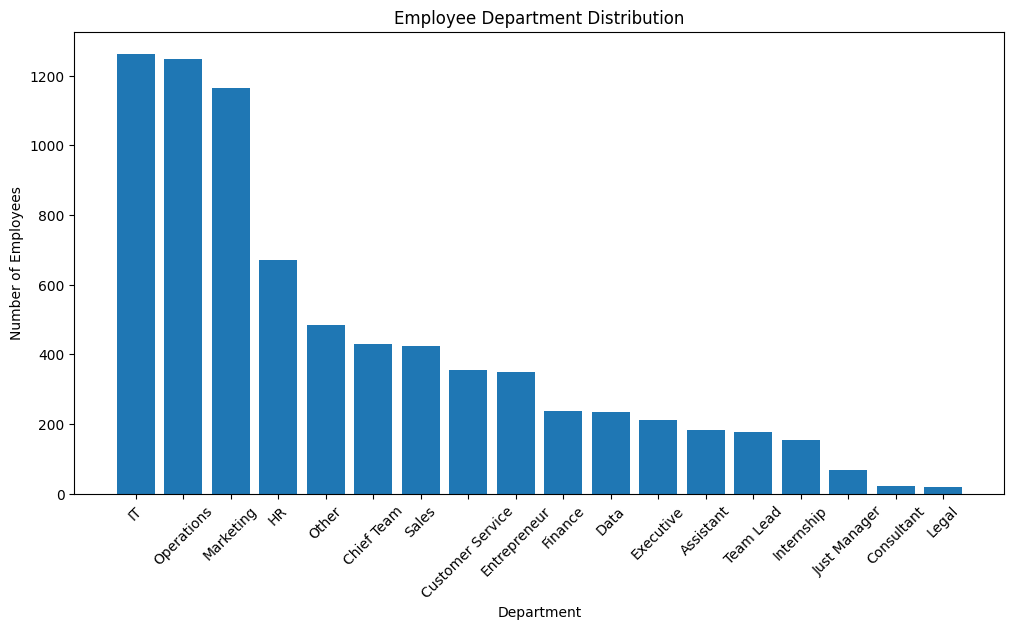

In [29]:
import matplotlib.pyplot as plt

# Create a bar graph of the 'Department' value counts
department_counts = employee_table['Department'].value_counts()
plt.bar(department_counts.index, department_counts.values)

# Set the chart title and axes labels
plt.title('Employee Department Distribution')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

# Enlarge the graph on the x-axis and rotate the x-axis labels
plt.gcf().set_size_inches(12, 6)  # Set the figure size
plt.xticks(rotation=45)          # Rotate the x-axis labels

# Display the chart
plt.show()

In [72]:
employee_table.to_csv('employee_roles.csv',index=False)

In [28]:
employee_table.to_excel('employee_roles.xlsx',index=False)

In [22]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
pd.reset_option('all')